In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
from torchvision import transforms as tvt
from torch.utils.data import DataLoader

In [119]:
def apply_color(images, labels, biased=False):
    colors = np.array(
        [[230, 25, 75],
        [245, 130, 48],
        [255, 225, 25],
        [250, 190, 190],
        [0, 130, 200],
        [230, 190, 255],
        [240, 50, 230],
        [70, 240, 240],
        [60, 180, 75],
        [170, 110, 40]])
    
    if biased:
        # assign a random probability to each color, for each class
        # each class has a predilection to one color, with a smaller probability of assuming others
        bias = np.eye(10) + np.random.randint(0,2,(10,10)) / 100
    else:
        # for test samples each color should be equally likely
        bias = np.ones((10,10))
        
    # make sure bias sums to 1 across its rows
    bias = bias / bias.sum(axis=1,keepdims=1)
    
    color_labels = np.zeros(labels.shape)
    i = 0
    for im, lb in zip(images, labels):
        # get the color probabilities for this class
        color_probs = bias[lb]
        color_index = np.random.choice(np.arange(10), p=color_probs)
        color_labels[i] = color_index
        i = i + 1
        color = colors[color_index]

        for i in range(3):
            im[i,:,:] *= color[i] / 255

    color_labels = torch.tensor(color_labels)
    return images, color_labels
        

In [115]:
# create the data loader
transform = tvt.Compose([
    # convert from PIL to tensor
    tvt.ToTensor(), 
    # convert from gray to rgb
    tvt.Lambda(lambda x: x.repeat(3, 1, 1) )
])
mnist = datasets.MNIST(root='E:/data/datasets/mnist', train=True, download=True, transform=transform)
loader = DataLoader(mnist, batch_size=100, shuffle=False)

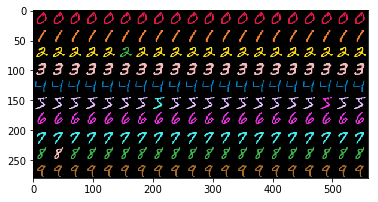

In [120]:
# create a 10x20 collage of training samples

collage = np.zeros((280,560,3))
for i in range(20):
    images, labels = next(iter(loader)) 
    images, colors = apply_color(images, labels, True)
    for j in range(10):
        ix = np.where(labels == j)[0][0]
        im = images[ix]
        im = np.swapaxes(im, 0, 1)
        im = np.swapaxes(im, 1, 2)
        collage[j*28:(j+1)*28, i*28:(i+1)*28, :] = im

plt.imshow(collage)